In [1]:
!pip install tensorflow==2.10

import tensorflow
print(tensorflow.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 46.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.2
    Uninstalling tensorboard-2.11.2:
      Success

In [2]:
# Mounted drive to this network. 
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data_path1='drive/Shared with me/Data_Images/' # didn't work
data_path3='drive/My Drive/Colab Notebooks/RealFake/RealFake2/'
data_path4='drive/My Drive/Colab Notebooks/RealFake/RealFake/'
data_path2='drive/My Drive/Colab Notebooks/Data_Images2/' #no need

In [4]:
real_path = data_path3+'real/'
fake_path = data_path3+'fake/'

In [ ]:
# import os
# import cv2
# import imghdr
# import fnmatch
# import shutil

# # Creating real, fake subfolders in a 'RealFake' directory
# # (ONLY RUN IF YOU DON"T HAVE THE subfolders yet)
# for filename in os.listdir(data_path2):
#   source=data_path2+filename

#   if fnmatch.fnmatch(filename, '*_0.png'):
#     dest_real=real_path+filename
#     shutil.move(source, dest_real)

#   if fnmatch.fnmatch(filename, '*_1.png'):
#     dest_fake=fake_path+filename
#     shutil.move(source, dest_fake)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [5]:
# Creating the dataset
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Rescaling, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam

# Image Parameters
n_classes=2
img_height=256
img_width=256
channels=3
batch_size=5

data = tf.keras.utils.image_dataset_from_directory(
    data_path3,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

seed=200
# Training Dataset (80% of the Dataset)
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_path3,
  validation_split=0.2,
  subset="training",
  seed=seed,
  image_size=(img_height,img_width),
  batch_size=batch_size)

# Validation Dataset  (20% of the Dataset)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_path3,
  validation_split=0.2,
  subset="validation",
  seed=seed,
  image_size=(img_height,img_width),
  batch_size=batch_size)


class_names = train_ds.class_names
print(class_names)

Found 2041 files belonging to 2 classes.
Found 2041 files belonging to 2 classes.
Using 1633 files for training.
Found 2041 files belonging to 2 classes.
Using 408 files for validation.
['fake', 'real']


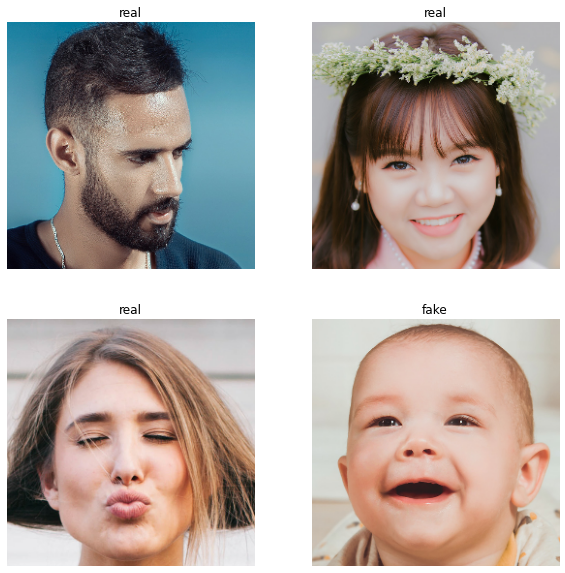

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
import tensorflow
print(tensorflow.__version__)

2.10.0


In [ ]:
# # Load the pre-trained VGG16 model
# vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# # Add new layers for binary classification on top of the pre-trained model
# num_classes = len(class_names)

# model = Sequential()
# model.add(Rescaling(1./255, input_shape=(img_height, img_width,3)))
# model.add(vgg16_model)
# model.add(GlobalAveragePooling2D()),
# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# # model.add(Flatten())
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Print the model summary
# # model.summary()

# # from tensorflow.keras import layers
# # from tensorflow.keras.models import Sequential

# model.compile(optimizer=Adam(lr=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy']
#              )

# model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout_5 (Dropout)         (None, 512)              

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers

model = keras.Sequential()
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(img_height, img_width,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', 
              optimizer=tf.optimizers.SGD(lr=0.001), 
              metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
327/327 [==============================] - 49s 32ms/step - loss: 1.5867 - accuracy: 0.5438 - val_loss: 1.2147 - val_accuracy: 0.5000
Epoch 2/15
327/327 [==============================] - 2s 7ms/step - loss: 1.1145 - accuracy: 0.5689 - val_loss: 0.8525 - val_accuracy: 0.5686
Epoch 3/15
327/327 [==============================] - 2s 8ms/step - loss: 0.7848 - accuracy: 0.6412 - val_loss: 0.9214 - val_accuracy: 0.5441
Epoch 4/15
327/327 [==============================] - 3s 8ms/step - loss: 0.6625 - accuracy: 0.6797 - val_loss: 0.8428 - val_accuracy: 0.5784
Epoch 5/15
327/327 [==============================] - 2s 7ms/step - loss: 0.5027 - accuracy: 0.7704 - val_loss: 0.9066 - val_accuracy: 0.5490
Epoch 6/15
327/327 [==============================] - 2s 7ms/step - loss: 0.4408 - accuracy: 0.7906 - val_loss: 0.8662 - val_accuracy: 0.5931
Epoch 7/15
327/327 [==============================] - 2s 7ms/step - loss: 0.3517 - accuracy: 0.8536 - val_loss: 0.9346 - val_accuracy: 0.5564
Epoc

In [16]:
model.save(data_path3+"test_AlexNet.h5")

In [17]:
# Testing the model with images from Dall-E
import numpy as np
from tensorflow import keras
from keras.preprocessing import image
from keras.models import load_model

reload_model=keras.models.load_model(data_path3+'test_AlexNet.h5')
reload_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 256)      1024      
 hNormalization)                                                 
                                                        

In [23]:
# load the image and convert it to the required format
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from PIL import Image

input_size=(256,256)

def test_model(img):
  test_image = load_img(img)
  test_image=test_image.resize(input_size)
  test_image = img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis=0)

  # make the prediction
  result = reload_model.predict(test_image)
  # predicted_class = np.argmax(result)

  if (np.round(result,1)<=0.5):
    verdict="Fake Image"
  else:
    verdict="Real Image"

  return print("Image Predicted Value: ", result, "\nVerdict: ", verdict) 

In [24]:
test1=data_path4+'donald.png' # real donald trump
test2=data_path4+'donaldrealfake.jpg' #generated donald trump
# test3=fake_path+'Image2673_1.png' #fake from training images
# test4=real_path+'Image2700_0.png' #real from training images

test3=fake_path+'mid_474_1110.jpg' #fake from training images
test4=real_path+'real_01081.jpg' #real from training images

In [25]:
print("\nInput: Real Donald")
test_model(test1)

print("\nInput: Fake Donald")
test_model(test2)

print("\nInput: Fake Training")
test_model(test3)

print("\nInput: Real Training")
test_model(test4)


Input: Real Donald
1/1 [==============================] - 0s 26ms/step
Image Predicted Value:  [[0.95253974]] 
Verdict:  Real Image

Input: Fake Donald
1/1 [==============================] - 0s 22ms/step
Image Predicted Value:  [[0.9159273]] 
Verdict:  Real Image

Input: Fake Training
1/1 [==============================] - 0s 23ms/step
Image Predicted Value:  [[0.00112292]] 
Verdict:  Fake Image

Input: Real Training
1/1 [==============================] - 0s 23ms/step
Image Predicted Value:  [[0.9827336]] 
Verdict:  Real Image


In [26]:
test5=data_path4+'donald.png' # real donald trump
test6=data_path4+'donaldfake2.png' #generated donald trump
test7=data_path4+'donaldfake3.png' #generated donald trump
test8=data_path4+'donaldfake4.png' #generated donald trump

print("\nInput: Real Donald")
test_model(test5)

print("\nInput: Fake Donald")
test_model(test6)

print("\nInput: Fake Donald")
test_model(test7)

print("\nInput: Fake Donald")
test_model(test8)


Input: Real Donald
1/1 [==============================] - 0s 24ms/step
Image Predicted Value:  [[0.95253974]] 
Verdict:  Real Image

Input: Fake Donald
1/1 [==============================] - 0s 23ms/step
Image Predicted Value:  [[0.9547462]] 
Verdict:  Real Image

Input: Fake Donald
1/1 [==============================] - 0s 24ms/step
Image Predicted Value:  [[0.93998367]] 
Verdict:  Real Image

Input: Fake Donald
1/1 [==============================] - 0s 25ms/step
Image Predicted Value:  [[0.62501943]] 
Verdict:  Real Image


In [27]:
test8=fake_path+'mid_446_0011.jpg' #fake from training images
test9=real_path+'real_01078.jpg' #real from training images
test10=fake_path+'mid_469_1111.jpg' #fake from training images
test11=real_path+'real_01068.jpg' #real from training images

print("\nInput: Fake Training")
test_model(test8)

print("\nInput: Real Training")
test_model(test9)

print("\nInput: Fake Training")
test_model(test10)

print("\nInput: Real Training")
test_model(test11)


Input: Fake Training
1/1 [==============================] - 0s 26ms/step
Image Predicted Value:  [[0.11968783]] 
Verdict:  Fake Image

Input: Real Training
1/1 [==============================] - 0s 22ms/step
Image Predicted Value:  [[0.9486702]] 
Verdict:  Real Image

Input: Fake Training
1/1 [==============================] - 0s 23ms/step
Image Predicted Value:  [[0.00555354]] 
Verdict:  Fake Image

Input: Real Training
1/1 [==============================] - 0s 26ms/step
Image Predicted Value:  [[0.9901882]] 
Verdict:  Real Image
